## ROBUST SCALER:
IT IS USED TO SCALE OUR FEATURES TO MEDIAN AND QUANTILES:\
IN THIS TYPE OF SCALING TECHNIQUE WE BASICALY SUBTRACT  THE MEDIAN TO ALL THE OBSERVATION AND THEN DIVIDE IT BY THE INTERQUARTILE RANGE ie; THE DIFFERNCE OF 75TH QUANTILE and 25TH QUANTILE

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
df=pd.read_csv('titanic_train-Copy1.csv',usecols=['Age','Fare','Survived','Pclass'])

In [14]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [24]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [25]:
df.Age.fillna(df.Age.median(),inplace=True)

In [26]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [27]:
from sklearn.preprocessing import RobustScaler

In [28]:
scaler=RobustScaler()

In [29]:
data=scaler.fit_transform(df)

In [30]:
dataframe=pd.DataFrame(data=data,columns=df.columns)

In [31]:
dataframe.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <BarContainer object of 20 artists>)

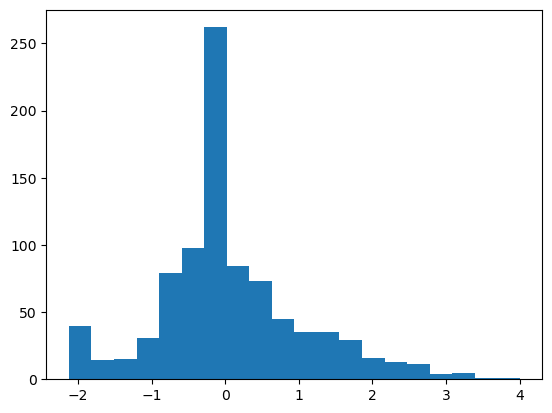

In [32]:
plt.hist(dataframe['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <BarContainer object of 20 artists>)

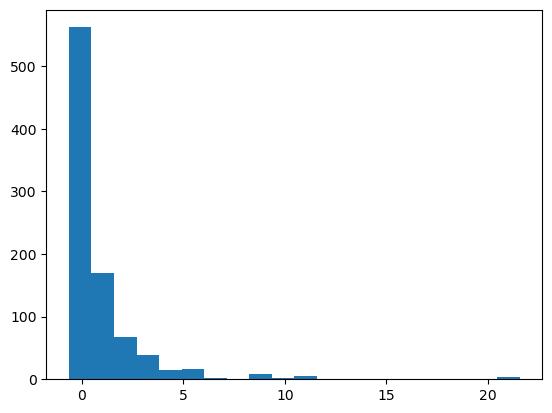

In [23]:
plt.hist(dataframe['Fare'],bins=20)

 ## Gaussian transformation
 it basically means normally distributed,means if our data is not norammly distributed than in it we apply some of the mathematical equations to actually converts it into normal distribution cos, some of the algorithms works well like linear and logistis regression when our data is normally distributed
 ### TYPES OF GAUSSIAN TRANSFORMATION:
 
 ### 1) LOGRITHMIC TRANSFORMATION:
  if our data is not normally distributed than to make it nORMALLY distributed we use the "LOGRITHMIC DISTRIBUTION"
  ### 2) RECIPROCAL TRANSFORMATION:
  ### 3) SQUARE ROOT TRANSFORMATION:
  ### 4) EXPONENTIAL TRANSFORMATION:( MORE GENERAL , USE ANY EXPONENT
  ### 5) BOXCOX TRANSFORAMTION:

In [35]:
df=pd.read_csv('titanic_train-Copy1.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [36]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [37]:
df.Age.fillna(df.Age.median(),inplace=True)

In [40]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [43]:
## technique to check whether the feature is gaussian/normALly distributed using the Q_Q plot
import scipy.stats as stat
import pylab
def QQplot(df,feature):
    plt.figure(figsize=(15,10))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    

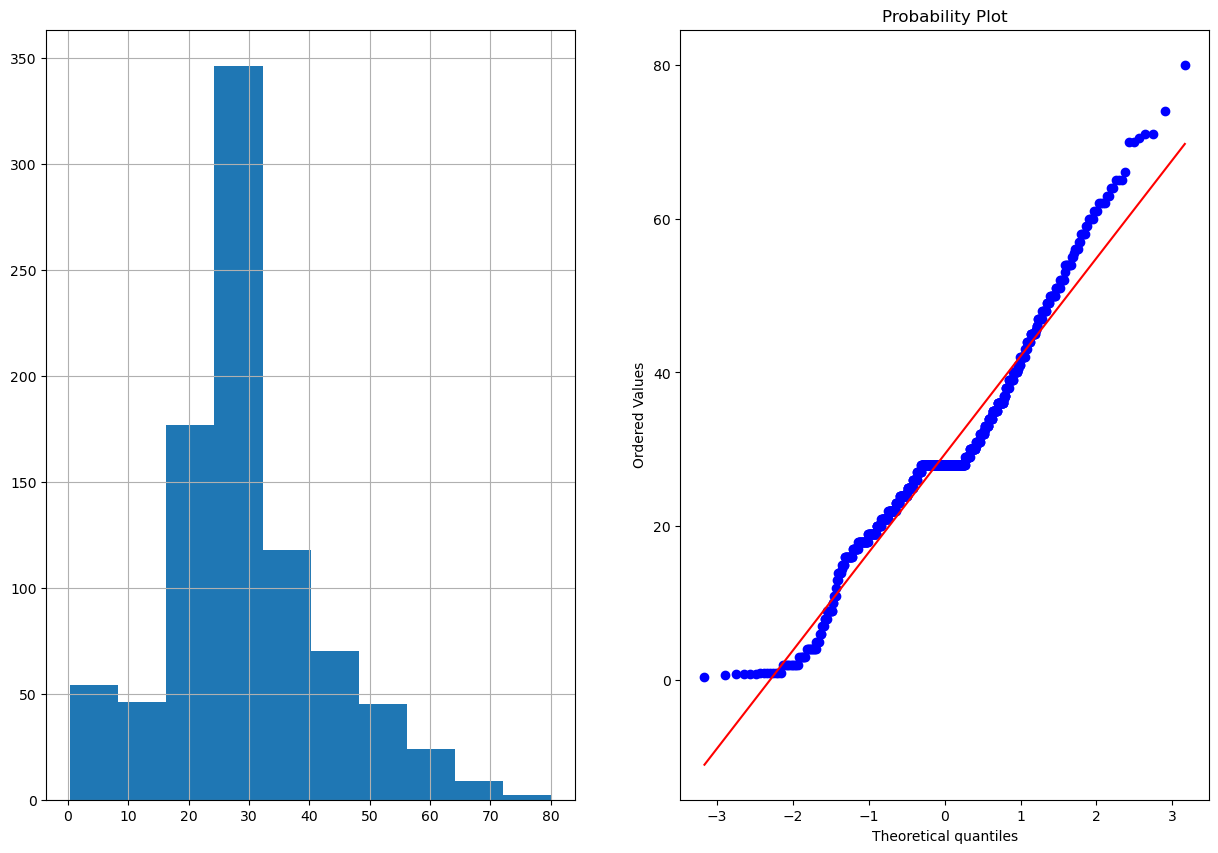

In [51]:
QQplot(df,'Age')

In [46]:
## logrithmic distribution : it works well when our data is left skewed or right skewed.
df['age_log']=np.log(df['Age'])

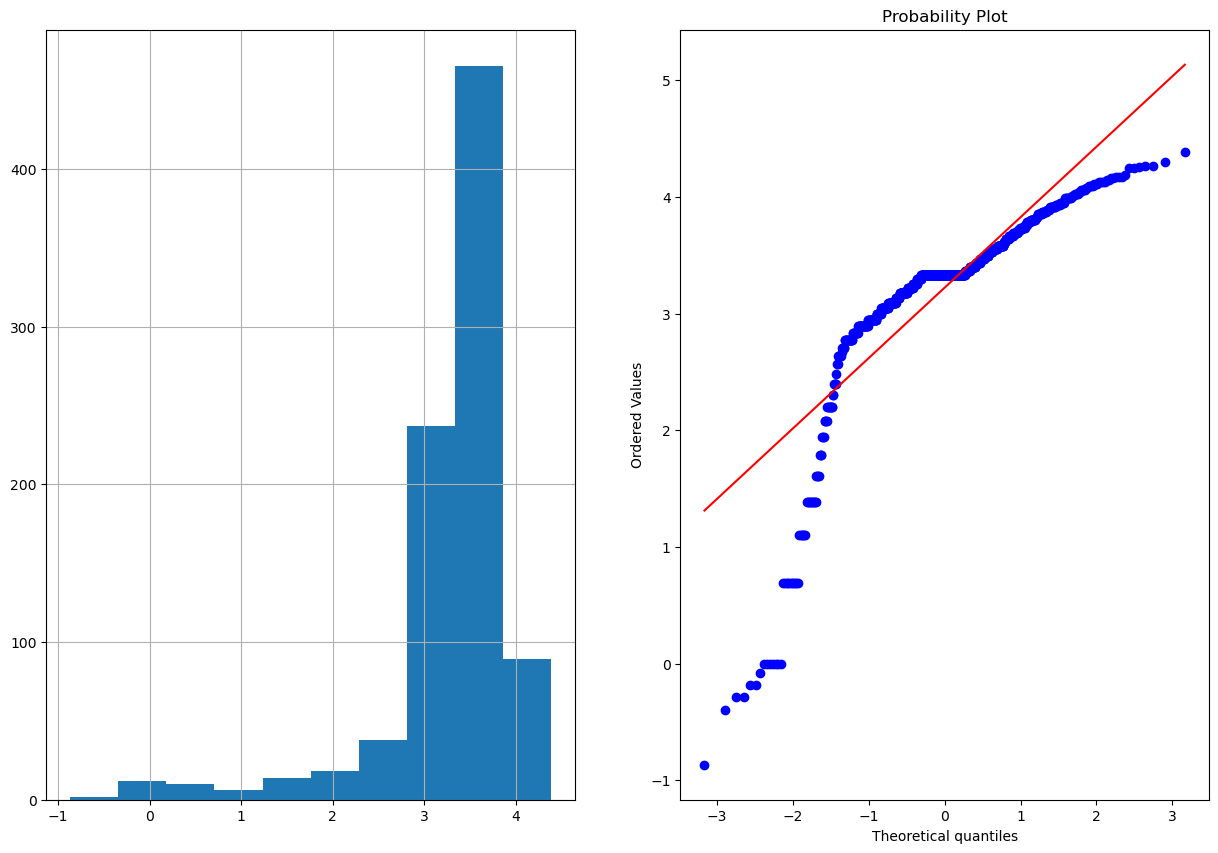

In [47]:
QQplot(df,'age_log')

## RECIPROCAL TRANSFORMATION
]

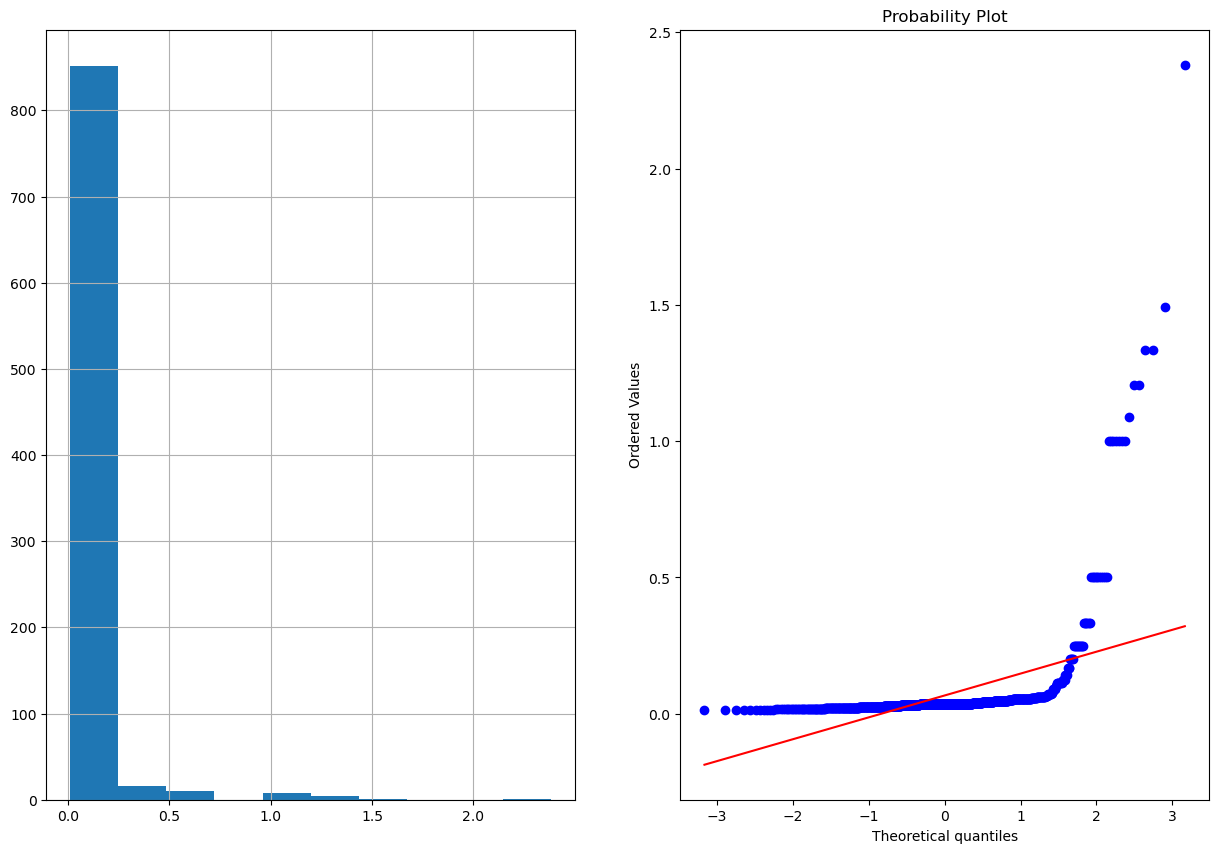

In [55]:
df['age_reciprocal']=1/df.Age
QQplot(df,'age_reciprocal')

## square root transformation

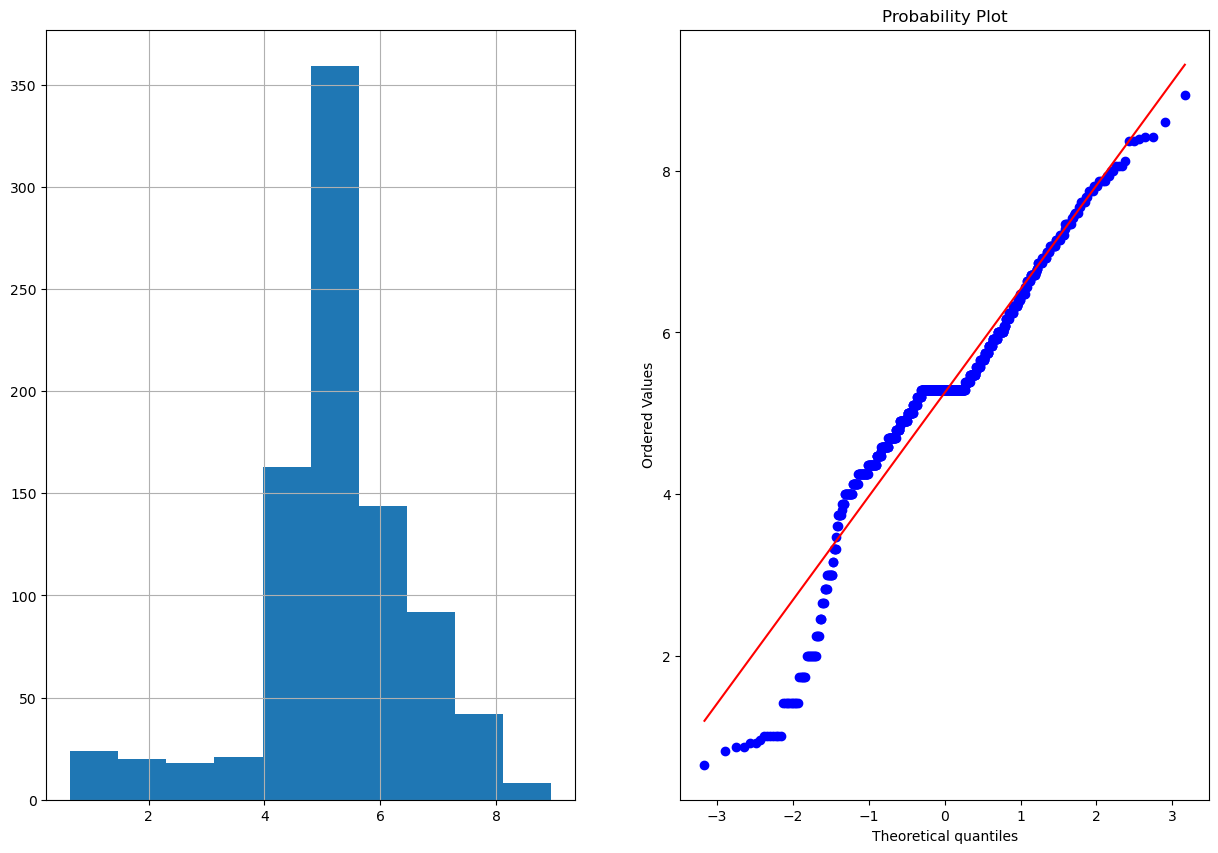

In [56]:
df['age_squareroot']=df.Age**(1/2)
QQplot(df,'age_squareroot')

## exponential transformation:
we can vary its value as needed. as it involves base and the power .


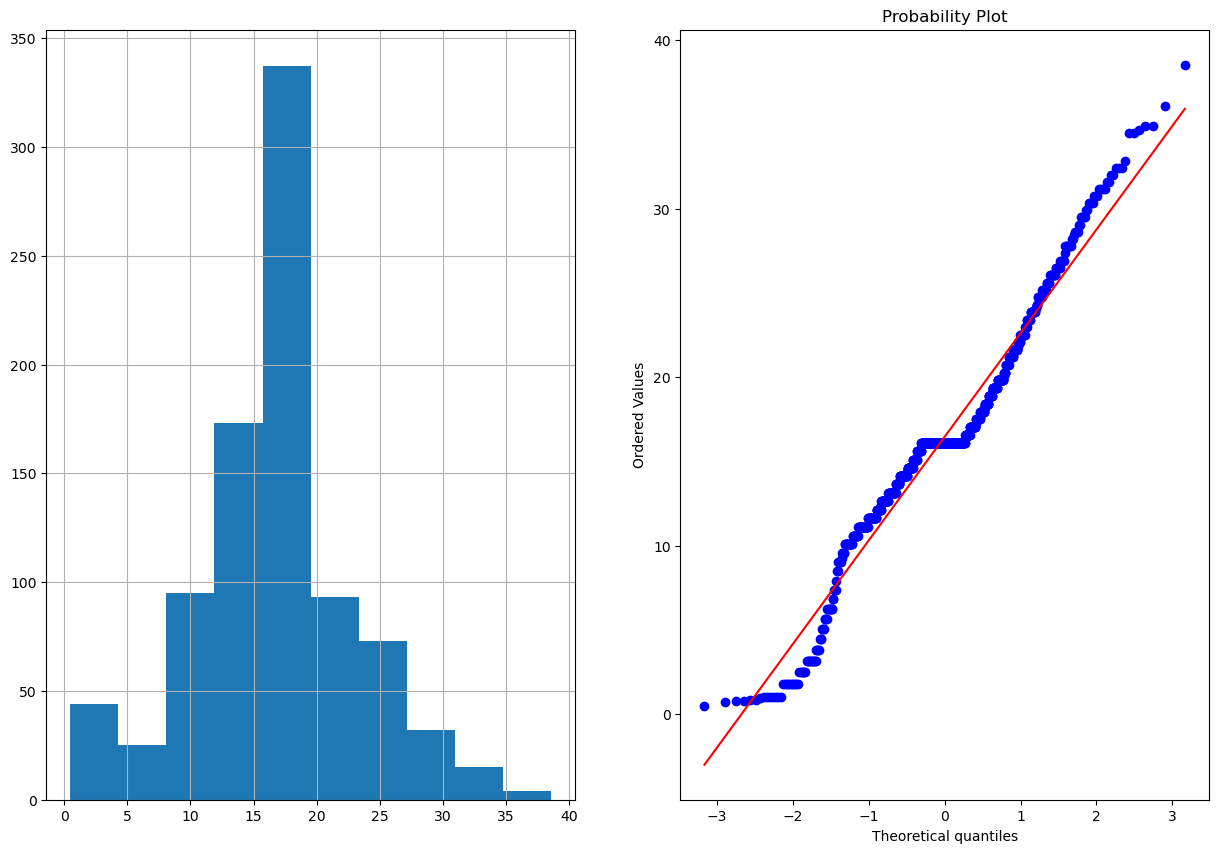

In [58]:
df['age_exponent']=df.Age**(1/1.2)
QQplot(df,'age_exponent')

## boxcox transformation


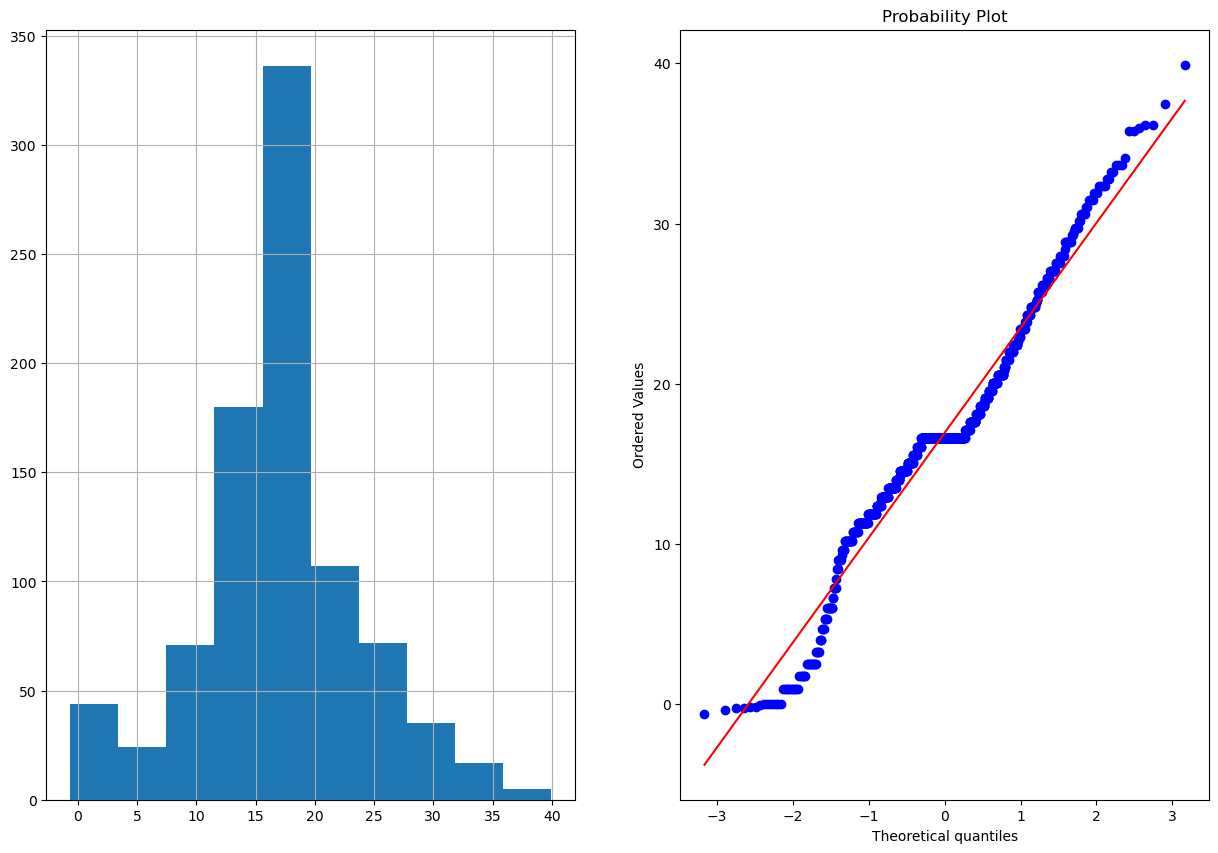

In [62]:
df['age_boxcox'],parameter=stat.boxcox(df['Age'])
QQplot(df,'age_boxcox')

In [63]:
print(parameter)

0.7964531473656952


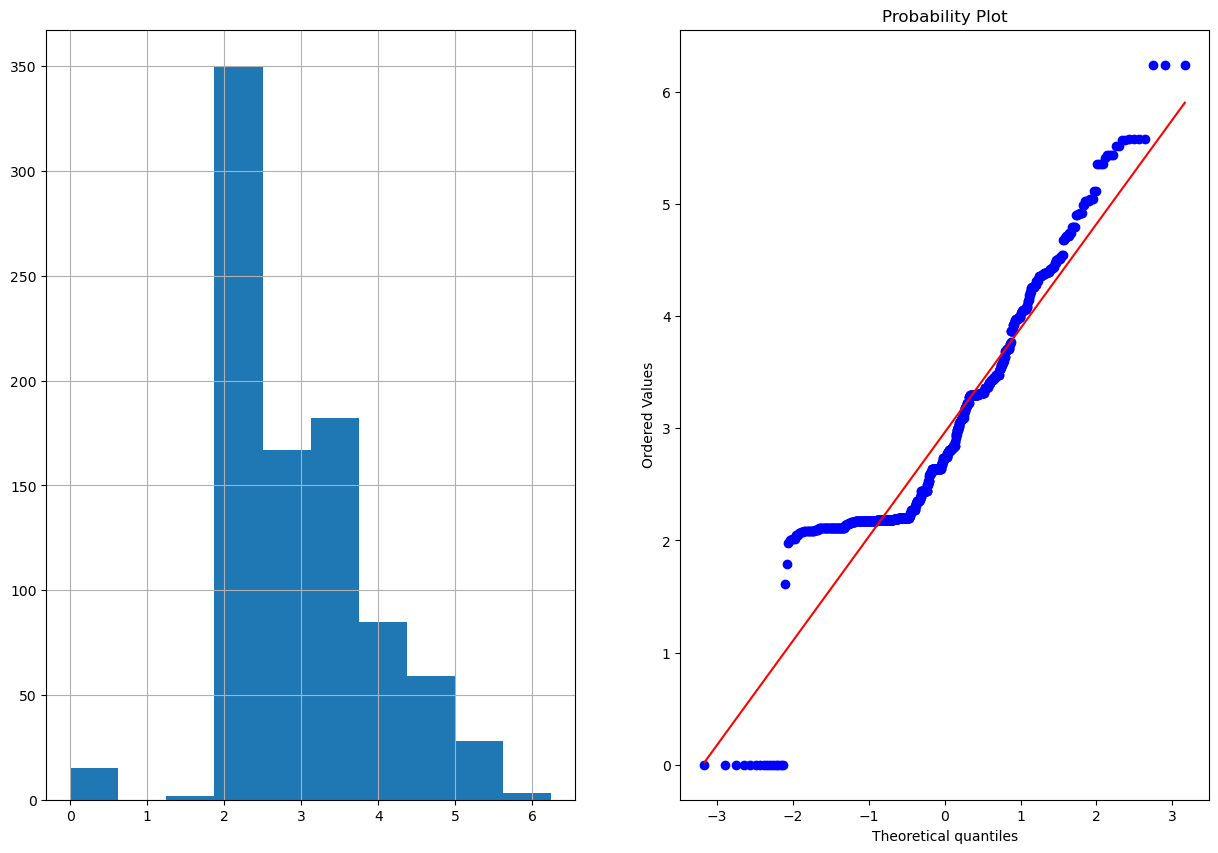

In [65]:
df['fare_log']=np.log1p(df['Fare'])
QQplot(df,'fare_log')

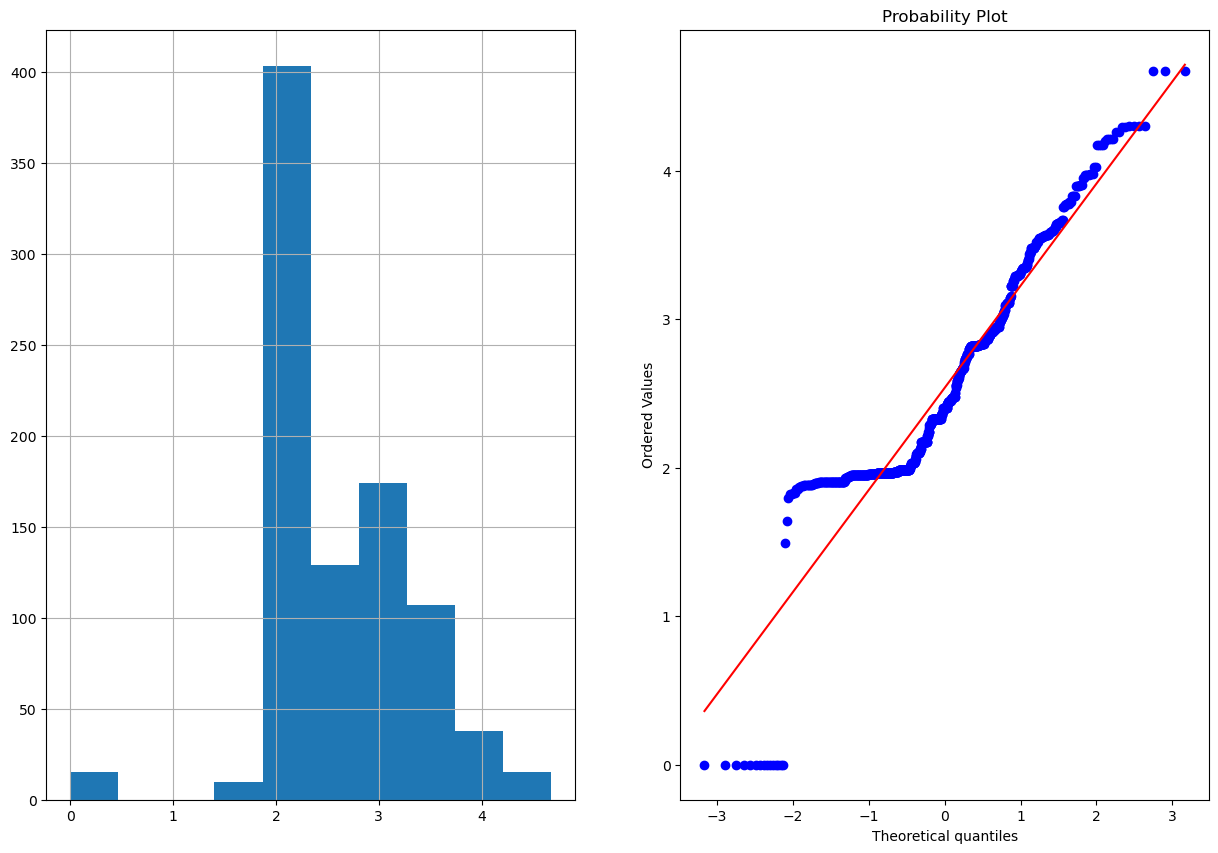

In [67]:
df['fare_boxcox'],parameter=stat.boxcox(df['Fare']+1)
QQplot(df,'fare_boxcox')